# Primary Text Processing

## Summary

In [1]:
# Code summary of below

In [2]:
!python --version

Python 3.11.4


## Import

### Libraries

In [3]:
from backend import *
import random

In [4]:
%matplotlib inline

### Definitions

In [5]:
texts = '../texts/fiction/utf8/'

libCols = ['author','pub_year','title','text']
tokenOHCO = ['w_id','part_num','para_num', 'sent_num', 'token_num']
tokenCols = ['p_id', 'start', 'stop', 'text', 'token_id', 'head_id', 'rel', 'pos', 'lemma', 'anim', 'aspect', \
             'case', 'degree', 'gender', 'mood', 'number', 'person', 'tense', 'verb_form', 'voice']

In [6]:
#!curl --silent https://xkcd.com/color/rgb.txt | grep -E '(\w+\s?\w?\s?)(#[[:alnum:]]{6})' > xkcd_colors.txt
xkcd_colors_list = './xkcd_colors.txt'
with open(xkcd_colors_list, 'r') as f: 
    xkcd_colors = f.readlines()
xkcd_colors_dict = {}
for color in [x.split('\t') for x in xkcd_colors]:
    xkcd_colors_dict.update({color[0]:color[1]})

In [7]:
import random
def xkcd_color_picker():
    color_id = list(xkcd_colors_dict.items())[random.randint(0, len(xkcd_colors_dict)-1)]
    return color_id

## Library

In [8]:
libDf = pd.DataFrame(columns = libCols)
for t in os.listdir(texts): 
    if t[-4:] == '.txt': 
        #print(t)
        info = re.match(r'(\w+)-(\d{4})-(.+).txt', t)
        with codecs.open(texts+t, 'r') as f: 
            textytext = f.read()
        subDf = pd.DataFrame({'author': info.group(1),'pub_year': int(info.group(2)), 'title': info.group(3), 'text': textytext}, index=[1])
        libDf = pd.concat([libDf, subDf], ignore_index=True)
        
libDf = libDf.sort_values(libCols[1:3]).reset_index().drop(['index'], axis=1)
libDf.index.name = 'w_id'
libTextsDf = libDf[[libCols[3]]]
libDf = libDf.drop(columns=[libCols[3]])
libDf

,author,pub_year,title
w_id,,,
0,gorkii,1900,troe
1,andreev,1903,zhizn-vasiliia-fiveiskogo
2,andreev,1904,gubernator
3,andreev,1905,k-zvezdam
4,andreev,1905,khristiane
5,andreev,1905,tak-bylo
6,gorkii,1906,mat
7,andreev,1906,savva-ignis-sanat
8,andreev,1907,iuda-iskariot


In [9]:
libTextsDf

,text
w_id,
0,Среди лесов Керженца рассеяно много оди...
1,*I*\n\n Над всей жизнью Василия ...
2,I \n\n \n ...
3,1\n \n Обсерват...
4,За окнами падал мокрый нояб...
5,1\n\n Стояла на площади огромная чер...
6,*I*\n\n Каждый день над рабочей слоб...
7,1\n \t \n В...
8,1\n \n Иисуса Христа много раз...


### Regularize

In [10]:
confessionTextDf = textRegularize(libTextsDf, 10)
confessionTextDf

,text,paraID
0,...Позвольте рассказать жизнь мою; врем...,1
1,"Я -- крапивник, подкидыш, незаконный че...",2
2,"У Данилы прожил я до четырёх лет, но он...",3
3,Четырёх лет взял меня к себе дьячок Лар...,4
4,"От людей в стороне стоял, жил бедно, на...",5
...,...,...
2357,Окрыляет он жизнь её величием деяний и ...,2356
2358,"-- Ты еси мой бог и творец всех богов, ...",2357
2359,-- Да не будут миру бози инии разве теб...,2358
2360,-- Тако верую и исповедую!,2359


In [11]:
dpTextDf = textRegularize(libTextsDf, 14)
dpTextDf

,chapID,para,text,paraID
0,1,1,"Народ не только сила, создающая все мат...",1
1,1,2,"Во дни своего детства, руководимый инст...",2
2,1,3,"В мифе и эпосе, как и в языке, главном ...",3
3,1,4,Что образование и построение языка -- п...,4
4,1,5,Мы еще не имеем достаточного количества...,5
...,...,...,...,...
287,12,28,"Но хулиган -- кровное дитя мещанина, эт...",266
288,12,29,Это драма -- семейная драма врага; мы с...,267
289,12,30,Нам -- это естественное желание здорово...,268
290,12,31,Ибо для нас история всемирной культуры ...,269


In [12]:
motherTextDf = textRegularize(libTextsDf, 6)
motherTextDf

,chapID,para,text,paraID
0,1,1,"Каждый день над рабочей слободкой, в ды...",1
1,1,2,"Вечером, когда садилось солнце, и на ст...",2
2,1,3,"День проглочен фабрикой, машины высосал...",3
3,1,4,"По праздникам спали часов до десяти, по...",4
4,1,5,"Усталость, накопленная годами, лишала л...",5
...,...,...,...,...
4490,58,90,Ударили по руке.,4432
4491,58,91,"-- Только злобы накопите, безумные! На ...",4433
4492,58,92,Жандарм схватил ее за горло и стал души...,4434
4493,58,93,-- Несчастные...,4435


<Axes: xlabel='chapID'>

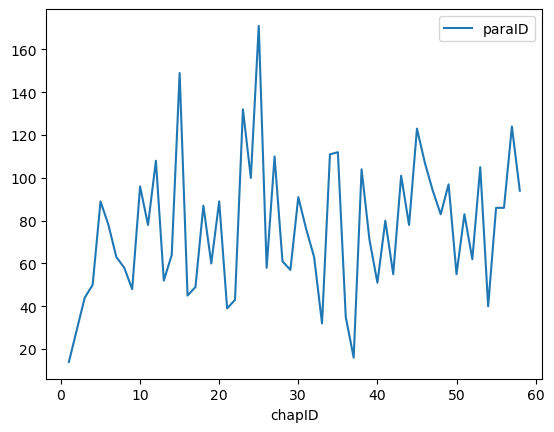

In [13]:
motherTextDf.groupby('chapID').paraID.count().to_frame().plot()

In [14]:
# split into chapters
detstvoTextDf = libTextsDf.loc[[22]]
detstvoTextDf = pd.DataFrame(data=detstvoTextDf.text.str.split(r'\*\w+\*\n\n').to_list()[0]).reset_index()
detstvoTextDf = detstvoTextDf.rename(columns={'index':'chap', 0:'text'})[1:]
detstvoTextDf = detstvoTextDf.text.str.split('\n\n', expand=True).stack().to_frame().reset_index().drop('level_1', axis=1).drop([1, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22], axis=0)
detstvoTextDf = detstvoTextDf.rename(columns={'level_0':'chap', 0:'text'})
detstvoTextDf = detstvoTextDf['text'].str.split(' \n', expand=True).stack().to_frame().reset_index().rename(columns={'level_0':'chapID','level_1':'para',0:'text'})
# regularize
detstvoTextDf['text'] = detstvoTextDf.text.str.replace('\n|\s{2,}', '')
# remove white space paragraphs
detstvoTextDf = detstvoTextDf.loc[~detstvoTextDf.text.str.contains(r"^\W*$", regex=True)]
#textDf['part'] = detstvoTextDf.chapID.apply(lambda x: int('1') if x < 30 else int('2'))
#textDf['chap'] = detstvoTextDf.chapID.map(textDf['chapID'].to_dict())
detstvoTextDf['para'] = detstvoTextDf['para'].apply(lambda x: x+1)
detstvoTextDf['paraID'] = range(1, len(detstvoTextDf)+1)
detstvoTextDf

,chapID,para,text,paraID
0,0,1,"В полутёмной тесной комнате, на полу, п...",1
1,0,2,"Мать, полуголая, в красной юбке, стоит ...",2
2,0,3,"Меня держит за руку бабушка -- круглая,...",3
3,0,4,"Я никогда ещё не видал, чтобы большие п...",4
4,0,5,"-- Попрощайся с тятей-то, никогда уж не...",5
...,...,...,...,...
2848,23,212,"-- Гляди, ты гляди, чего он делает! -- ...",2780
2849,23,213,"Мне понравилось это, и мы пошли в поле.",2781
2851,23,215,Через несколько дней после похорон мате...,2782
2852,23,216,"-- Ну, Лексей, ты -- не медаль, на шее ...",2783


## Words

### Tokens

In [15]:
motherTokenDf = pd.read_pickle('./proc/MotherTokendf.pkl')#.set_index(['p_id','token_id'])

In [16]:
motherTokenDf.set_index(['p_id','token_id'])

start stop       text head_id    rel   pos     lemma  anim  \
p_id token_id                                                              
1    1_1          7   13     Каждый     1_2    det   DET    каждый  None   
     1_2         14   18       день    1_28    obl  NOUN      день  Inan   
     1_3         19   22        над     1_5   case   ADP       над  None   
     1_4         23   30    рабочей     1_5   amod   ADJ   рабочий  None   
     1_5         31   40  слободкой    1_28    obl  NOUN  слободка  Inan   
...             ...  ...        ...     ...    ...   ...       ...   ...   
4436 1_1          7   13     Кто-то     1_2  nsubj  PRON    кто-то  None   
     1_2         14   21    ответил     1_0   root  VERB  ответить  None   
     1_3         22   24         ей     1_2   iobj  PRON       она  None   
     1_4         25   32    громким     1_5   amod   ADJ   громкий  None   
     1_5         33   41   рыданием     1_2    obl  NOUN   рыдание  Anim   

              aspect  case degree gender  mood number person tense verb_form  \
p_id token_id                                                                  
1    1_1        None   Acc   None   Masc  None   Sing   None  None      None   
     1_2        None   Acc   None   Masc  None   Sing   None  None      None   
     1_3        None  None   None   None  None   None   None  None      None   
     1_4        None   Ins    Pos    Fem  None   Sing   None  None      None   
     1_5        None   Ins   None    Fem  None   Sing   None  None      None   
...              ...   ...    ...    ...   ...    ...    ...   ...       ...   
4436 1_1        None   Nom   None   None  None   None   None  None      None   
     1_2        Perf  None   None   Masc   Ind   Sing   None  Past       Fin   
     1_3        None   Dat   None    Fem  None   Sing      3  None      None   
     1_4        None   Dat    Pos   None  None   Plur   None  None      None   
     1_5        None   Dat   None   Masc  None   Plur   None  None      None   

              voice  
p_id token_id        
1    1_1       None  
     1_2       None  
     1_3       None  
     1_4       None  
     1_5       None  
...             ...  
4436 1_1       None  
     1_2        Act  
     1_3       None  
     1_4       None  
     1_5       None  

[86009 rows x 18 columns]

In [17]:
confessionTokenDf = pd.read_pickle('./proc/ConfessionTokenDf.pkl')

In [18]:
confessionTokenDf.set_index(['p_id', 'token_id'])

start stop               text head_id     rel   pos  \
p_id token_id                                                       
1    1_2         10   19          Позвольте     1_0    root  VERB   
     1_3         20   30         рассказать     1_2   xcomp  VERB   
     1_4         31   36              жизнь     1_3     obj  NOUN   
     1_5         37   40                мою    1_17     det   DET   
     1_7         42   49            времени    1_10     obj  NOUN   
...             ...  ...                ...     ...     ...   ...   
2360 1_49       283  291           великого    1_50    amod   ADJ   
     1_50       292  296               дела    1_11     obl  NOUN   
     1_52       300  310         всемирного    1_53    amod   ADJ   
     1_53       311  328  богостроительства    1_50   appos  NOUN   
     1_54       329  333               ради    1_11  advmod  NOUN   

                           lemma  anim aspect  case degree gender  mood  \
p_id token_id                                                             
1    1_2               позволить  None   Perf  None   None   None   Imp   
     1_3              рассказать  None   Perf  None   None   None  None   
     1_4                   жизнь  Inan   None   Acc   None    Fem  None   
     1_5                     мой  None   None   Acc   None    Fem  None   
     1_7                   время  Inan   None   Gen   None   Neut  None   
...                          ...   ...    ...   ...    ...    ...   ...   
2360 1_49                великий  None   None   Gen    Pos   Neut  None   
     1_50                   дело  Inan   None   Gen   None   Neut  None   
     1_52              всемирный  None   None   Gen    Pos   Masc  None   
     1_53      богостроительство  Inan   None   Gen   None   Neut  None   
     1_54                   ради  Inan   None   Gen   None   Masc  None   

              number person tense verb_form voice  
p_id token_id                                      
1    1_2        Plur      2  None       Fin   Act  
     1_3        None   None  None       Inf   Act  
     1_4        Sing   None  None      None  None  
     1_5        Sing   None  None      None  None  
     1_7        Sing   None  None      None  None  
...              ...    ...   ...       ...   ...  
2360 1_49       Sing   None  None      None  None  
     1_50       Sing   None  None      None  None  
     1_52       Sing   None  None      None  None  
     1_53       Sing   None  None      None  None  
     1_54       Sing   None  None      None  None  

[47484 rows x 18 columns]

In [19]:
childhoodTokenDf = pd.read_pickle('./proc/ChildhoodTokenDf.pkl')

In [20]:
childhoodTokenDf.set_index(['p_id', 'token_id'])

start stop        text head_id    rel    pos       lemma  anim  \
p_id token_id                                                                  
1    1_1          7    8           В     1_4   case    ADP           в  None   
     1_2          9   19  полутёмной    1_28    obl    ADJ  полутемный  None   
     1_3         20   26      тесной     1_4   amod    ADJ      тесный  None   
     1_4         27   34     комнате    1_46    obl   NOUN     комната  Inan   
     1_6         36   38          на     1_7   case    ADP          на  None   
...             ...  ...         ...     ...    ...    ...         ...   ...   
2784 1_1          7    8           И     1_2     cc  CCONJ           и  None   
     1_2          9   14       пошёл     1_0   root   VERB       пойти  None   
     1_3         15   16           я     1_2  nsubj   PRON           я  None   
     1_4         17   18           в     1_5   case    ADP           в  None   
     1_5         19   23        люди     1_2    obl   NOUN     человек  Anim   

              aspect  case degree gender  mood number person tense verb_form  \
p_id token_id                                                                  
1    1_1        None  None   None   None  None   None   None  None      None   
     1_2        None   Loc    Pos    Fem  None   Sing   None  None      None   
     1_3        None   Loc    Pos    Fem  None   Sing   None  None      None   
     1_4        None   Loc   None    Fem  None   Sing   None  None      None   
     1_6        None  None   None   None  None   None   None  None      None   
...              ...   ...    ...    ...   ...    ...    ...   ...       ...   
2784 1_1        None  None   None   None  None   None   None  None      None   
     1_2        Perf  None   None   Masc   Ind   Sing   None  Past       Fin   
     1_3        None   Nom   None   None  None   Sing      1  None      None   
     1_4        None  None   None   None  None   None   None  None      None   
     1_5        None   Nom   None   Masc  None   Plur   None  None      None   

              voice  
p_id token_id        
1    1_1       None  
     1_2       None  
     1_3       None  
     1_4       None  
     1_6       None  
...             ...  
2784 1_1       None  
     1_2        Act  
     1_3       None  
     1_4       None  
     1_5       None  

[53779 rows x 18 columns]

In [21]:
dpTokenDf = pd.read_pickle('./proc/DpTokenDf.pkl')

In [22]:
dpTokenDf.set_index(['p_id', 'token_id'])

start stop         text head_id     rel    pos      lemma  anim  \
p_id token_id                                                                   
1    1_1          7   12        Народ    1_16   nsubj   NOUN      народ  Inan   
     1_2         13   15           не     1_3  advmod   PART         не  None   
     1_3         16   22       только     1_2   fixed   PART     только  None   
     1_4         23   27         сила     1_0    root   NOUN       сила  Inan   
     1_6         29   38    создающая     1_9     acl   VERB  создавать  None   
...             ...  ...          ...     ...     ...    ...        ...   ...   
270  3_25       526  535    классовых    3_30    amod    ADJ  классовый  None   
     3_27       537  546    групповых    3_25    conj    ADJ  групповой  None   
     3_28       547  548            и    3_29      cc  CCONJ          и  None   
     3_29       553  562    партийных    3_25    conj    ADJ  партийный  None   
     3_30       563  574  коллективов    3_14    nmod   NOUN  коллектив  Inan   

              aspect  case degree gender  mood number person tense verb_form  \
p_id token_id                                                                  
1    1_1        None   Nom   None   Masc  None   Sing   None  None      None   
     1_2        None  None   None   None  None   None   None  None      None   
     1_3        None  None   None   None  None   None   None  None      None   
     1_4        None   Nom   None    Fem  None   Sing   None  None      None   
     1_6         Imp   Nom   None    Fem  None   Sing   None  Pres      Part   
...              ...   ...    ...    ...   ...    ...    ...   ...       ...   
270  3_25       None   Gen    Pos   None  None   Plur   None  None      None   
     3_27       None   Gen    Pos   None  None   Plur   None  None      None   
     3_28       None  None   None   None  None   None   None  None      None   
     3_29       None   Gen    Pos   None  None   Plur   None  None      None   
     3_30       None   Gen   None   Masc  None   Plur   None  None      None   

              voice  
p_id token_id        
1    1_1       None  
     1_2       None  
     1_3       None  
     1_4       None  
     1_6        Act  
...             ...  
270  3_25      None  
     3_27      None  
     3_28      None  
     3_29      None  
     3_30      None  

[14730 rows x 18 columns]

### Vocab

In [23]:
motherRankDf = GetRankDf(motherTokenDf)
motherRankDf

,count,rank
lemma,,
она,2209,1
он,1982,2
я,1196,3
мать,983,4
весь,902,5
...,...,...
тешиться,1,8068
объедаться,1,8069
пас,1,8070


In [24]:
confessionRankDf = GetRankDf(confessionTokenDf)
confessionRankDf

,count,rank
lemma,,
я,2082,1
он,1126,2
весь,539,3
говорить,488,4
ты,474,5
...,...,...
двойственный,1,6627
западать,1,6628
подергиваться,1,6629


In [25]:
childhoodRankDf = GetRankDf(childhoodTokenDf)
childhoodRankDf

,count,rank
lemma,,
я,1711,1
он,1277,2
она,751,3
быть,585,4
ты,572,5
...,...,...
вливаться,1,8043
новенький,1,8044
шлепнуть,1,8045


In [26]:
dpRankDf = GetRankDf(dpTokenDf)
dpRankDf

,count,rank
lemma,,
он,246,1
свой,203,2
весь,150,3
быть,124,4
человек,122,5
...,...,...
татарин,1,3637
бояр,1,3638
чиновник,1,3639


In [27]:
def arrangeFigures(*figures):
    fig, ax = plt.subplots(1,2)
    sns.plotType(someData, ax=ax[0])  # plot1
    sns.plotType(someData, ax=ax[1])  # plot2
    fig.show()

### Time-Token Matrices (TTM)

In [28]:
def makeBOW(tokenDf):
    bowDf = tokenDf.groupby(['p_id', 'lemma']).lemma.count().to_frame('n')
    return bowDf

def makeDTCM(bowDf):
    dtcmDf = bowDf.n.unstack(fill_value=0)
    return dtcmDf

def makeTTM(tokenDf):
    TTM = pd.get_dummies(tokenDf['lemma'], columns=['lemma'], prefix_sep='', drop_first=False).reset_index(drop=True).iloc[:,1:]
    TTM.index.name = 'time_id'
    TTM = TTM.astype('int')
    return TTM

def getVocabTTM(TTM, vocab_words):
    cfg = {'figsize': (20,6)}
    num_words = len(vocab_words)
    fig, axs = plt.subplots(num_words, sharex=True, sharey=True, **cfg)
    fig.suptitle('Appearance of vocab in Mother')
    for i in range(0, num_words):
        graph_color = xkcd_color_picker()[1]
        axs[i].plot(TTM[vocab_words[i]], graph_color)
        axs[i].set_title(vocab_words[i], color=graph_color, rotation='vertical',x=-0.01,y=0.3)
    for ax in axs:
        ax.set_yticks([])

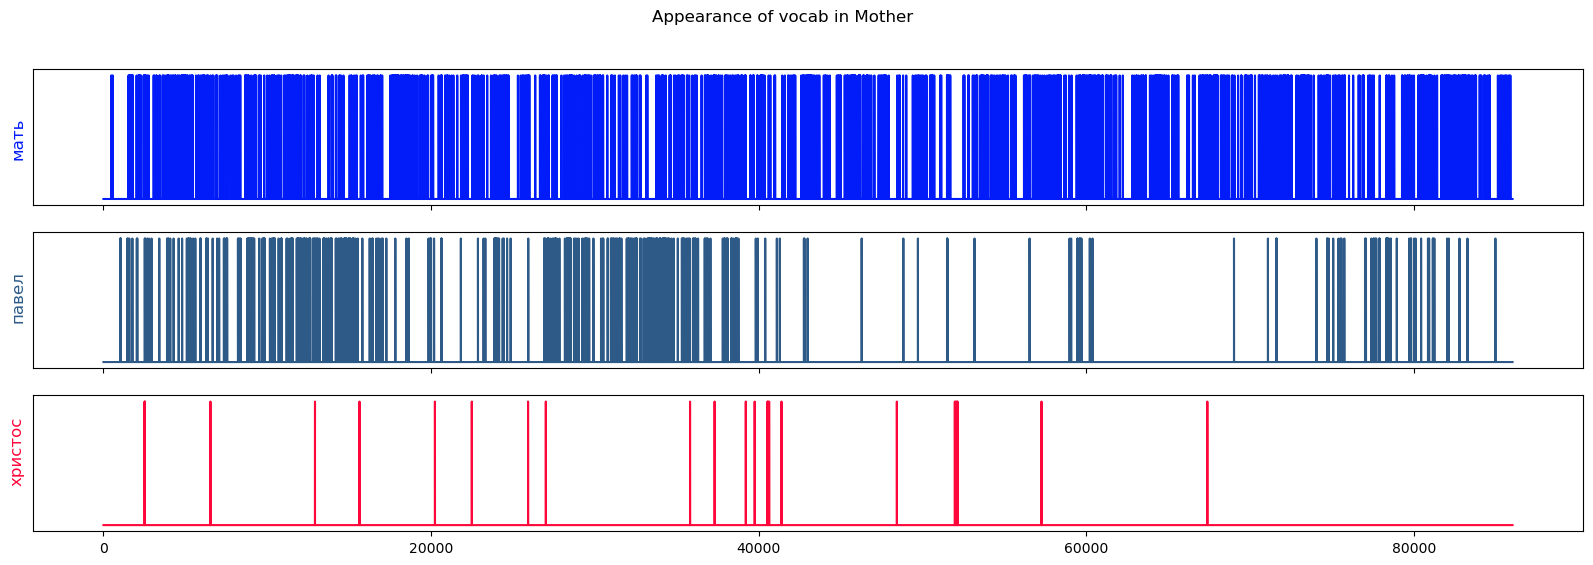

In [29]:
ttmwords = ['мать', 'павел', 'христос']
motherTTM = makeTTM(motherTokenDf)
getVocabTTM(motherTTM, ttmwords)

## Vectorization

### TFIDF

In [30]:
motherRankDf, confessionRankDf, childhoodRankDf, dpRankDf

(            count  rank
 lemma                  
 она          2209     1
 он           1982     2
 я            1196     3
 мать          983     4
 весь          902     5
 ...           ...   ...
 тешиться        1  8068
 объедаться      1  8069
 пас             1  8070
 невежество      1  8071
 глотка          1  8072
 
 [8072 rows x 2 columns],
                count  rank
 lemma                     
 я               2082     1
 он              1126     2
 весь             539     3
 говорить         488     4
 ты               474     5
 ...              ...   ...
 двойственный       1  6627
 западать           1  6628
 подергиваться      1  6629
 досиня             1  6630
 обряд              1  6631
 
 [6631 rows x 2 columns],
            count  rank
 lemma                 
 я           1711     1
 он          1277     2
 она          751     3
 быть         585     4
 ты           572     5
 ...          ...   ...
 вливаться      1  8043
 новенький      1  8044
 шлепнуть      

In [31]:
motherChapParaDict = dict(zip(motherTextDf.paraID, motherTextDf.chapID))

In [32]:
motherTokenDf = motherTokenDf.reset_index().drop('index', axis=1)
motherTokenDf['c_id'] = motherTokenDf.p_id.apply(lambda x: motherChapParaDict.get(x))
motherTokenDf

,p_id,start,stop,text,token_id,head_id,rel,pos,lemma,anim,...,case,degree,gender,mood,number,person,tense,verb_form,voice,c_id
0,1,7,13,Каждый,1_1,1_2,det,DET,каждый,None,...,Acc,None,Masc,None,Sing,None,None,None,None,1
1,1,14,18,день,1_2,1_28,obl,NOUN,день,Inan,...,Acc,None,Masc,None,Sing,None,None,None,None,1
2,1,19,22,над,1_3,1_5,case,ADP,над,None,...,None,None,None,None,None,None,None,None,None,1
3,1,23,30,рабочей,1_4,1_5,amod,ADJ,рабочий,None,...,Ins,Pos,Fem,None,Sing,None,None,None,None,1
4,1,31,40,слободкой,1_5,1_28,obl,NOUN,слободка,Inan,...,Ins,None,Fem,None,Sing,None,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86004,4436,7,13,Кто-то,1_1,1_2,nsubj,PRON,кто-то,None,...,Nom,None,None,None,None,None,None,None,None,58
86005,4436,14,21,ответил,1_2,1_0,root,VERB,ответить,None,...,None,None,Masc,Ind,Sing,None,Past,Fin,Act,58
86006,4436,22,24,ей,1_3,1_2,iobj,PRON,она,None,...,Dat,None,Fem,None,Sing,3,None,None,None,58
86007,4436,25,32,громким,1_4,1_5,amod,ADJ,громкий,None,...,Dat,Pos,None,None,Plur,None,None,None,None,58


In [78]:
motherBOW = motherTokenDf.groupby(['c_id', 'lemma']).lemma.count().to_frame('n')
motherDTCM = motherBOW.n.unstack(fill_value=0)

motherTF = motherDTCM.T / motherDTCM.T.sum()
motherTF = motherTF.transpose()

motherDF = motherDTCM.astype('bool').sum()
motherN = motherDTCM.shape[0]
motherIDF = np.log2(motherN / motherDF)

motherTFIDF = motherTF * motherIDF

motherRankDf['df'] = motherDF
motherRankDf['idf'] = motherIDF

motherBOW['tf'] = motherTF.stack()
motherBOW['tfidf'] = motherTFIDF.stack()
motherBOW.sort_values('tfidf', ascending=False)[:20]

n
c_id lemma         
1    а            4
     аппетит      1
     безотчетный  1
     беспокоить   1
     бессильный   1
...              ..
58   юный         1
     я            7
     яркий        1
     ярко         2
     ясный        1

[37244 rows x 1 columns]

In [79]:
motherDTCM = motherBOW.n.unstack(fill_value=0)

In [61]:
motherTF = motherDTCM.T / motherDTCM.T.sum()
motherTF = motherTF.transpose()
motherTF

lemma,--,c,ii,а,а-а,а-а-,австрияк,ага,ага-а,агитация,...,ярко-рыжие,ярмарка,ярче,ярый,яснее,ясно,ясность,ясный,ящерица,ящик
c_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.004884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001221,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.007364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.000000,0.000000,0.000000,0.008554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000855,0.00000,0.000000
4,0.000000,0.000000,0.000000,0.007937,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000794,0.00000,0.000000
5,0.000000,0.000000,0.000000,0.011372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001516,0.00000,0.000000
6,0.000000,0.000000,0.000000,0.009253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7,0.000000,0.000000,0.000569,0.006830,0.000000,0.000000,0.000569,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000569,0.00000,0.000000
8,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.001053,0.000000,0.000000,0.00000,0.000000
9,0.000000,0.000000,0.000000,0.009934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [62]:
motherDF = motherDTCM.astype('bool').sum()
motherDF

lemma
--          1
c           1
ii          3
а          58
а-а         2
           ..
ясно       11
ясность     2
ясный      25
ящерица     1
ящик        1
Length: 8197, dtype: int64

In [63]:
motherN = motherDTCM.shape[0]
motherIDF = np.log2(motherN / motherDF)
motherIDF

lemma
--         5.857981
c          5.857981
ii         4.273018
а          0.000000
а-а        4.857981
             ...   
ясно       2.398549
ясность    4.857981
ясный      1.214125
ящерица    5.857981
ящик       5.857981
Length: 8197, dtype: float64

In [80]:
motherTFIDF = motherTF * motherIDF

In [73]:
motherRankDf['df'] = motherDF
motherRankDf['idf'] = motherIDF

In [74]:
motherRankDf

,count,rank,df,idf
lemma,,,,
она,2209,1,58,0.000000
он,1982,2,58,0.000000
я,1196,3,57,0.025091
мать,983,4,56,0.050626
весь,902,5,58,0.000000
...,...,...,...,...
тешиться,1,8068,1,5.857981
объедаться,1,8069,1,5.857981
пас,1,8070,1,5.857981


In [86]:
motherBOW['tf'] = motherTF.stack()
motherBOW['tfidf'] = motherTFIDF.stack()
motherBOW.sort_values('tfidf', ascending=False)[:20]

,,n,tf,tfidf
c_id,lemma,,,
49,игнат,15,0.013724,0.052946
40,саша,20,0.019029,0.051152
54,судья,22,0.012956,0.042407
28,знамя,12,0.013683,0.041742
44,крыльцо,14,0.009709,0.041486
10,офицер,22,0.015342,0.041239
33,софья,14,0.015086,0.036185
57,людмила,30,0.011655,0.035555
55,судья,19,0.010759,0.035214


In [69]:
IDF = makeDTCM(makeBOW(childhoodTokenDf)).astype('bool').sum()
TF = makeBOW(childhoodTokenDf).groupby('p_id').apply(lambda x: x.n / x.n.sum())
TFIDF = TF * IDF
TFIDF = TFIDF.to_frame()

In [70]:
TFIDF

0
p_id p_id lemma          
1    1    белый      0.64
          босой      0.10
          в         30.80
          веселый    0.70
          глаз       3.64
...                   ...
2784 2784 в        154.00
          и        229.80
          пойти     13.20
          человек   26.60
          я        196.20

[46666 rows x 1 columns]

## Vector Space

In [160]:
fasttext_model_loc = './models/cc.ru.300.bin'
ft = fasttext.load_model(fasttext_model_loc)
ft.get_dimension()

300

In [161]:
motherModel = fasttext.train_unsupervised('./models/gorkii-1906-mother.txt', model='skipgram')

ValueError: ./models/gorkii-1906-mother.txt cannot be opened for training!

## Primary Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
import plotly_express as px
import seaborn as sns

sns.set(style='ticks')

In [43]:
libDf

,author,pub_year,title
w_id,,,
0,gorkii,1900,troe
1,andreev,1903,zhizn-vasiliia-fiveiskogo
2,andreev,1904,gubernator
3,andreev,1905,k-zvezdam
4,andreev,1905,khristiane
5,andreev,1905,tak-bylo
6,gorkii,1906,mat
7,andreev,1906,savva-ignis-sanat
8,andreev,1907,iuda-iskariot


In [80]:
motherTokenDf['w_id'] = 6
confessionTokenDf['w_id'] = 10
tokensDf = pd.concat([confessionTokenDf, motherTokenDf]).set_index('w_id')

In [81]:
tokensDf

,p_id,start,stop,text,token_id,head_id,rel,pos,lemma,anim,aspect,case,degree,gender,mood,number,person,tense,verb_form,voice
w_id,,,,,,,,,,,,,,,,,,,,
10,1,10,19,Позвольте,1_2,1_0,root,VERB,позволить,None,Perf,None,None,None,Imp,Plur,2,None,Fin,Act
10,1,20,30,рассказать,1_3,1_2,xcomp,VERB,рассказать,None,Perf,None,None,None,None,None,None,None,Inf,Act
10,1,31,36,жизнь,1_4,1_3,obj,NOUN,жизнь,Inan,None,Acc,None,Fem,None,Sing,None,None,None,None
10,1,37,40,мою,1_5,1_17,det,DET,мой,None,None,Acc,None,Fem,None,Sing,None,None,None,None
10,1,42,49,времени,1_7,1_10,obj,NOUN,время,Inan,None,Gen,None,Neut,None,Sing,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,4436,7,13,Кто-то,1_1,1_2,nsubj,PRON,кто-то,None,None,Nom,None,None,None,None,None,None,None,None
6,4436,14,21,ответил,1_2,1_0,root,VERB,ответить,None,Perf,None,None,Masc,Ind,Sing,None,Past,Fin,Act
6,4436,22,24,ей,1_3,1_2,iobj,PRON,она,None,None,Dat,None,Fem,None,Sing,3,None,None,None


In [73]:
import sklearn
from sklearn.decomposition import PCA
pca_engine = PCA(n_components=10)

DCM = pd.DataFrame(pca_engine.fit_transform(TFIDF.fillna(0)), index=TFIDF.index)
DCM.columns = ['PC{}'.format(i) for i in DCM.columns]
DCM = DCM.join(LIB[['author','label']], on='book_id')

def vis_pcs(M, a, b, label='author', hover_name='label', symbol=None, size=None):
    return px.scatter(M, f"PC{a}", f"PC{b}", color=label, hover_name=hover_name, 
                     symbol=symbol, size=size,
                     marginal_x='box', height=800)

def vis_loadings(a=0, b=1, hover_name='term_str'):
    X = LOADINGS.join(VSHORT)
    return px.scatter(X.reset_index(), f"PC{a}", f"PC{b}", 
                      text='term_str', size='i', color='max_pos_group', 
                      marginal_x='box', height=800)

vis_pcs(DCM, 0, 1)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
pca_engine = PCA(n_components=10)

DCM = pd.DataFrame(pca_engine.fit_transform(TFIDF.fillna(0)), index=TFIDF.index)
DCM.columns = ['PC{}'.format(i) for i in DCM.columns]
DCM = DCM.join(LIB[['author','label']], on='book_id')

def vis_pcs(M, a, b, label='author', hover_name='label', symbol=None, size=None):
    return px.scatter(M, f"PC{a}", f"PC{b}", color=label, hover_name=hover_name, 
                     symbol=symbol, size=size,
                     marginal_x='box', height=800)

def vis_loadings(a=0, b=1, hover_name='term_str'):
    X = LOADINGS.join(VSHORT)
    return px.scatter(X.reset_index(), f"PC{a}", f"PC{b}", 
                      text='term_str', size='i', color='max_pos_group', 
                      marginal_x='box', height=800)

In [ ]:
from navec import Navec

navec_model_loc = './models/navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [ ]:
import torch
from slovnet.model.emb import NavecEmbedding

In [ ]:
emb = NavecEmbedding(navec)
input = torch.tensor([1, 2, 0])
output = emb(input)

In [ ]:
output.shape

In [ ]:
def vectorize_text(text, embeddings):
    # Simple tokenization based on spaces (for demonstration purposes)
    tokens = text.split()
    
    # Initialize an empty tensor for storing embeddings
    vector = torch.zeros(embeddings.dim)
    
    for token in tokens:
        # Add the embeddings of each token; you might want to handle OOV (out-of-vocabulary) tokens
        vector += embeddings.get_vecs_by_tokens(token.lower(), lower_case_backup=True)
    
    # Average the vectors (simple approach)
    return vector / len(tokens)

In [ ]:
data = {'text': ['Hello world', 'PyTorch vectorization example', 'Text vectorization with PyTorch']}
df = pd.DataFrame(data)

In [ ]:
# Loading GloVe embeddings
glove = GloVe(name='6B', dim=100)  # Example: 100-dimensional GloVe vectors


In [ ]:
# Apply vectorization to each row in the DataFrame
df['vector'] = df['text'].apply(lambda x: vectorize_text(x, glove))